In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
from sklearn import svm

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 模拟数据产生
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# 产生训练数据
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]  # 将x+2和x-2两部分的数据合并
# 产测试数据
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# 产生一些异常点数据
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [4]:
# 模型训练（异常点检测的时候是使用正常样本来训练模型，模型是为了找正常数据的数据特征）
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [5]:
# 预测结果获取
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
# 返回1表示属于这个类别，-1表示不属于这个类别---> 那就是可以认为是异常点啦
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [7]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [6]:
# decision_function: 返回样本属于正常样本的可能性大小, 
# 默认情况，如果是大于0，那就认为是正常样本(predict返回+1)，
# 如果是小于0就认为是异常样本(predict返回-1)
clf.decision_function(X_test)

array([ 0.0436336 ,  0.05170487,  0.03647396,  0.04563551,  0.03472641,
        0.05291518,  0.05229203,  0.01109688,  0.04160639,  0.01779468,
        0.03505832,  0.03728764,  0.04174652,  0.03615505, -0.00791119,
        0.04927107,  0.04412201,  0.05092862,  0.05287624,  0.0402074 ,
        0.04332938,  0.05180453,  0.03670655,  0.04557193,  0.03458076,
        0.05265323,  0.05200235,  0.0059191 ,  0.04094904,  0.02017507,
        0.0344976 ,  0.03701075,  0.04193551,  0.03684478, -0.00777694,
        0.04915258,  0.04448004,  0.051094  ,  0.05264534,  0.03959476])

In [9]:
# 获取绘图的点信息
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[-0.72918076, -0.72708767, -0.72498525, ..., -0.90623987,
        -0.90642178, -0.90660043],
       [-0.72706885, -0.72495255, -0.7228268 , ..., -0.90606524,
        -0.90624972, -0.90643092],
       [-0.72494804, -0.72280842, -0.72065926, ..., -0.90588762,
        -0.90607471, -0.90625848],
       ...,
       [-0.90961516, -0.90948991, -0.90936229, ..., -0.70264675,
        -0.70481884, -0.70698443],
       [-0.90973561, -0.90961224, -0.90948652, ..., -0.7050626 ,
        -0.70721065, -0.70935228],
       [-0.90985385, -0.90973233, -0.90960849, ..., -0.70746713,
        -0.70959126, -0.71170903]])

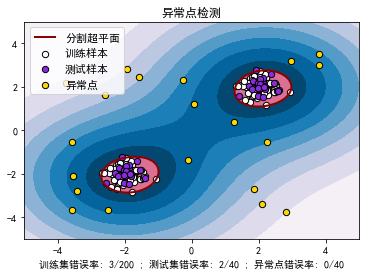

In [10]:
# 画图
plt.figure(facecolor='w')
plt.title("异常点检测")
# 画出区域图
# contourf: 画等高区域图(xx, yy给定坐标点，Z给定对应坐标点的取值， levels给定等高线的区间)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 9), cmap=plt.cm.PuBu)
# contour：画等高线图
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# 区域填充(在0~max区域做填充)
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# 画出点图
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')

# 设置相关信息
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["分割超平面", "训练样本", "测试样本", "异常点"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel("训练集错误率: %d/200 ; 测试集错误率: %d/40 ; 异常点错误率: %d/40" \
           % (n_error_train, n_error_test, n_error_outliers))
plt.show()